(-0.5, 609.5, 609.5, -0.5)

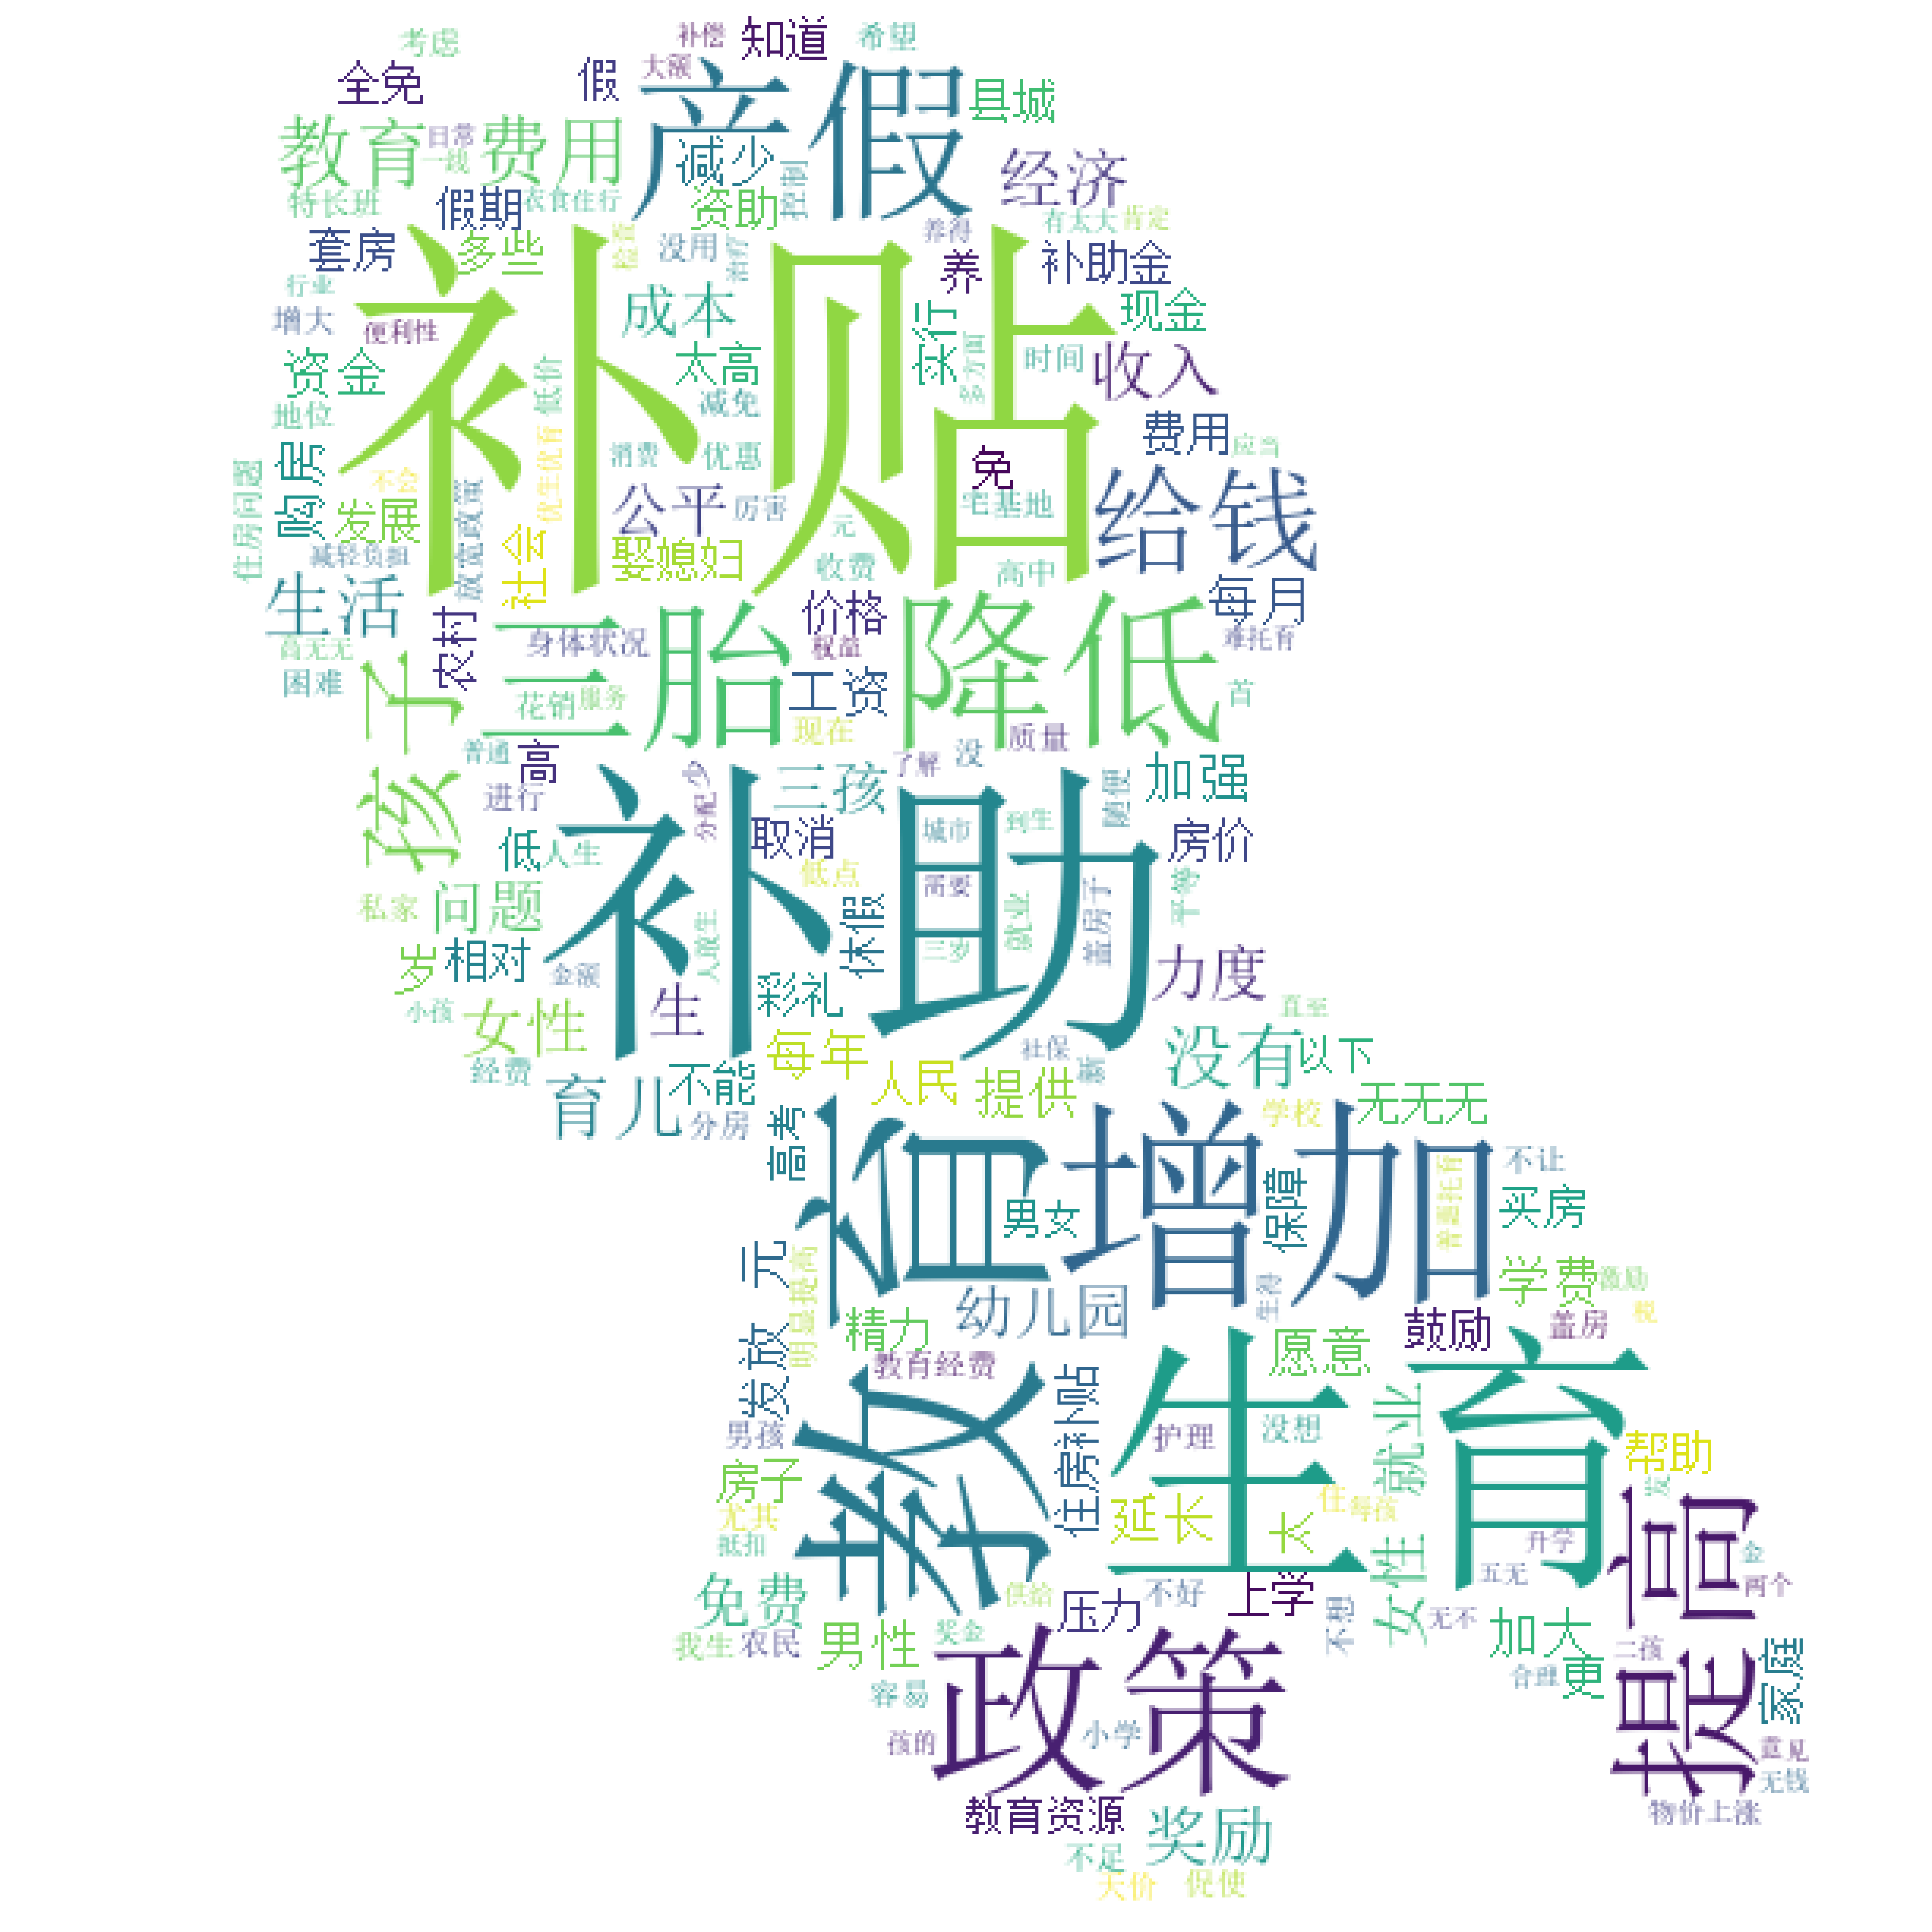

In [3]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 导入文本数据并进行文本处理 去掉换行符和空格
text = open("./gen.txt",encoding='utf8').read()
text = text.replace('\n',"").replace("\u3000","")
# 分词，返回结果为词的列表
text_cut = jieba.lcut(text)
# 将分好的词用某个符号分割开连成字符串
text_cut = ' '.join(text_cut)
stop_words = open("./cn_stopwords.txt",encoding="utf8").read().split("\n")
# 生成mask用于指定形状
from PIL import Image
import numpy as np
background = Image.open("./R-C.jpg")
graph = np.array(background)
# 使用WordCloud生成词云
word_cloud = WordCloud(font_path="simsun.ttc",   # 设置词云字体
                       background_color="white", # 词云图的背景颜色
                       stopwords=stop_words,
                       mask = graph,
                      width = 1920,
                      height = 1080)     # 去掉的停词
word_cloud.generate(text_cut)
word_cloud.to_file("output.png")

# 运用matplotlib展现结果
plt.subplots(figsize=(120,80))
plt.imshow(word_cloud)
plt.axis("off")